# Вебинар 1. Введение, примеры задач, бизнес- и ML-метрики 

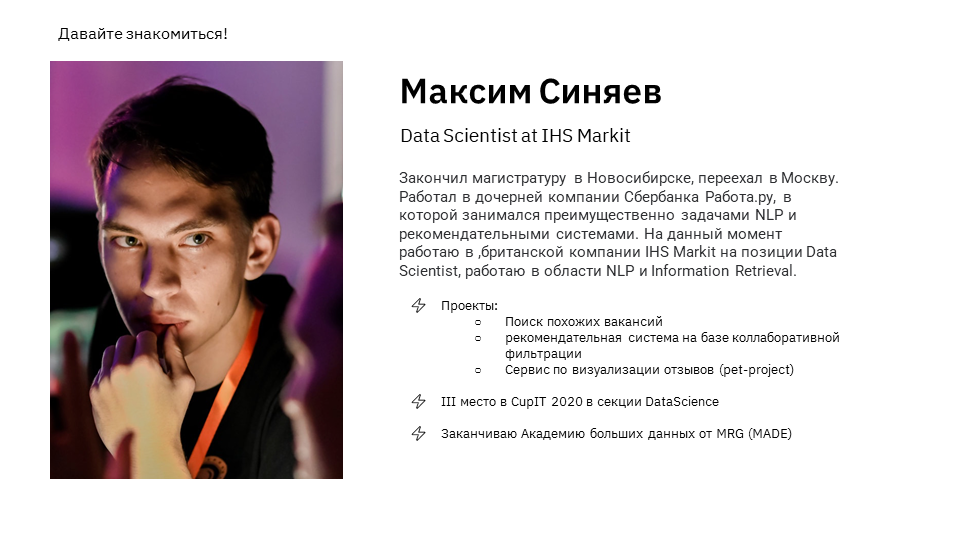

-----

# 1. Введение и примеры задач

Этот курс направлен на приобретения знаний и навыков, которые необходимы (но не достаточные) для работы специалиста Middle DS, Middle ML-engineer (рекомендательные системы - важная составляющая ML и DS). В курсе разбираются вопросы, которые могут встретиться на собеседовании: методы решения различных задач RS, матричная факторизация, задача ранжирования.

**Рекомендательные системы** - специальная область машинного обучения, в рамках которой решается следующая задача: по истории покупок для пользователя подбирается товар, который может быть интересен. При этом в различных задачах под пользователем, товаром и историей покупок могут пониматься различные сущности. Например рекомендация пользователям новых фильмов в онлайн-кинотеатре. Пользователи - это люди, фильмы - это товары, история покупок - просмотренные уже фильмы и выставленные им оценки.

С технической точки зрения специфика данной области - очень большое пространство объектов (и предсказаний для них). Например для 50k пользователей и 20k товаров необходимо сделать 1 миллиард предсказаний - это вычислительно очень сложная задача


Чему вы научитесь по прохождению курса:
 - создавать рекомендательные системы, основанные на контенте
 - создавать рекомендательные системы с использованием коллаборативной фильтрации
 - оценивать качество рекомендательных систем


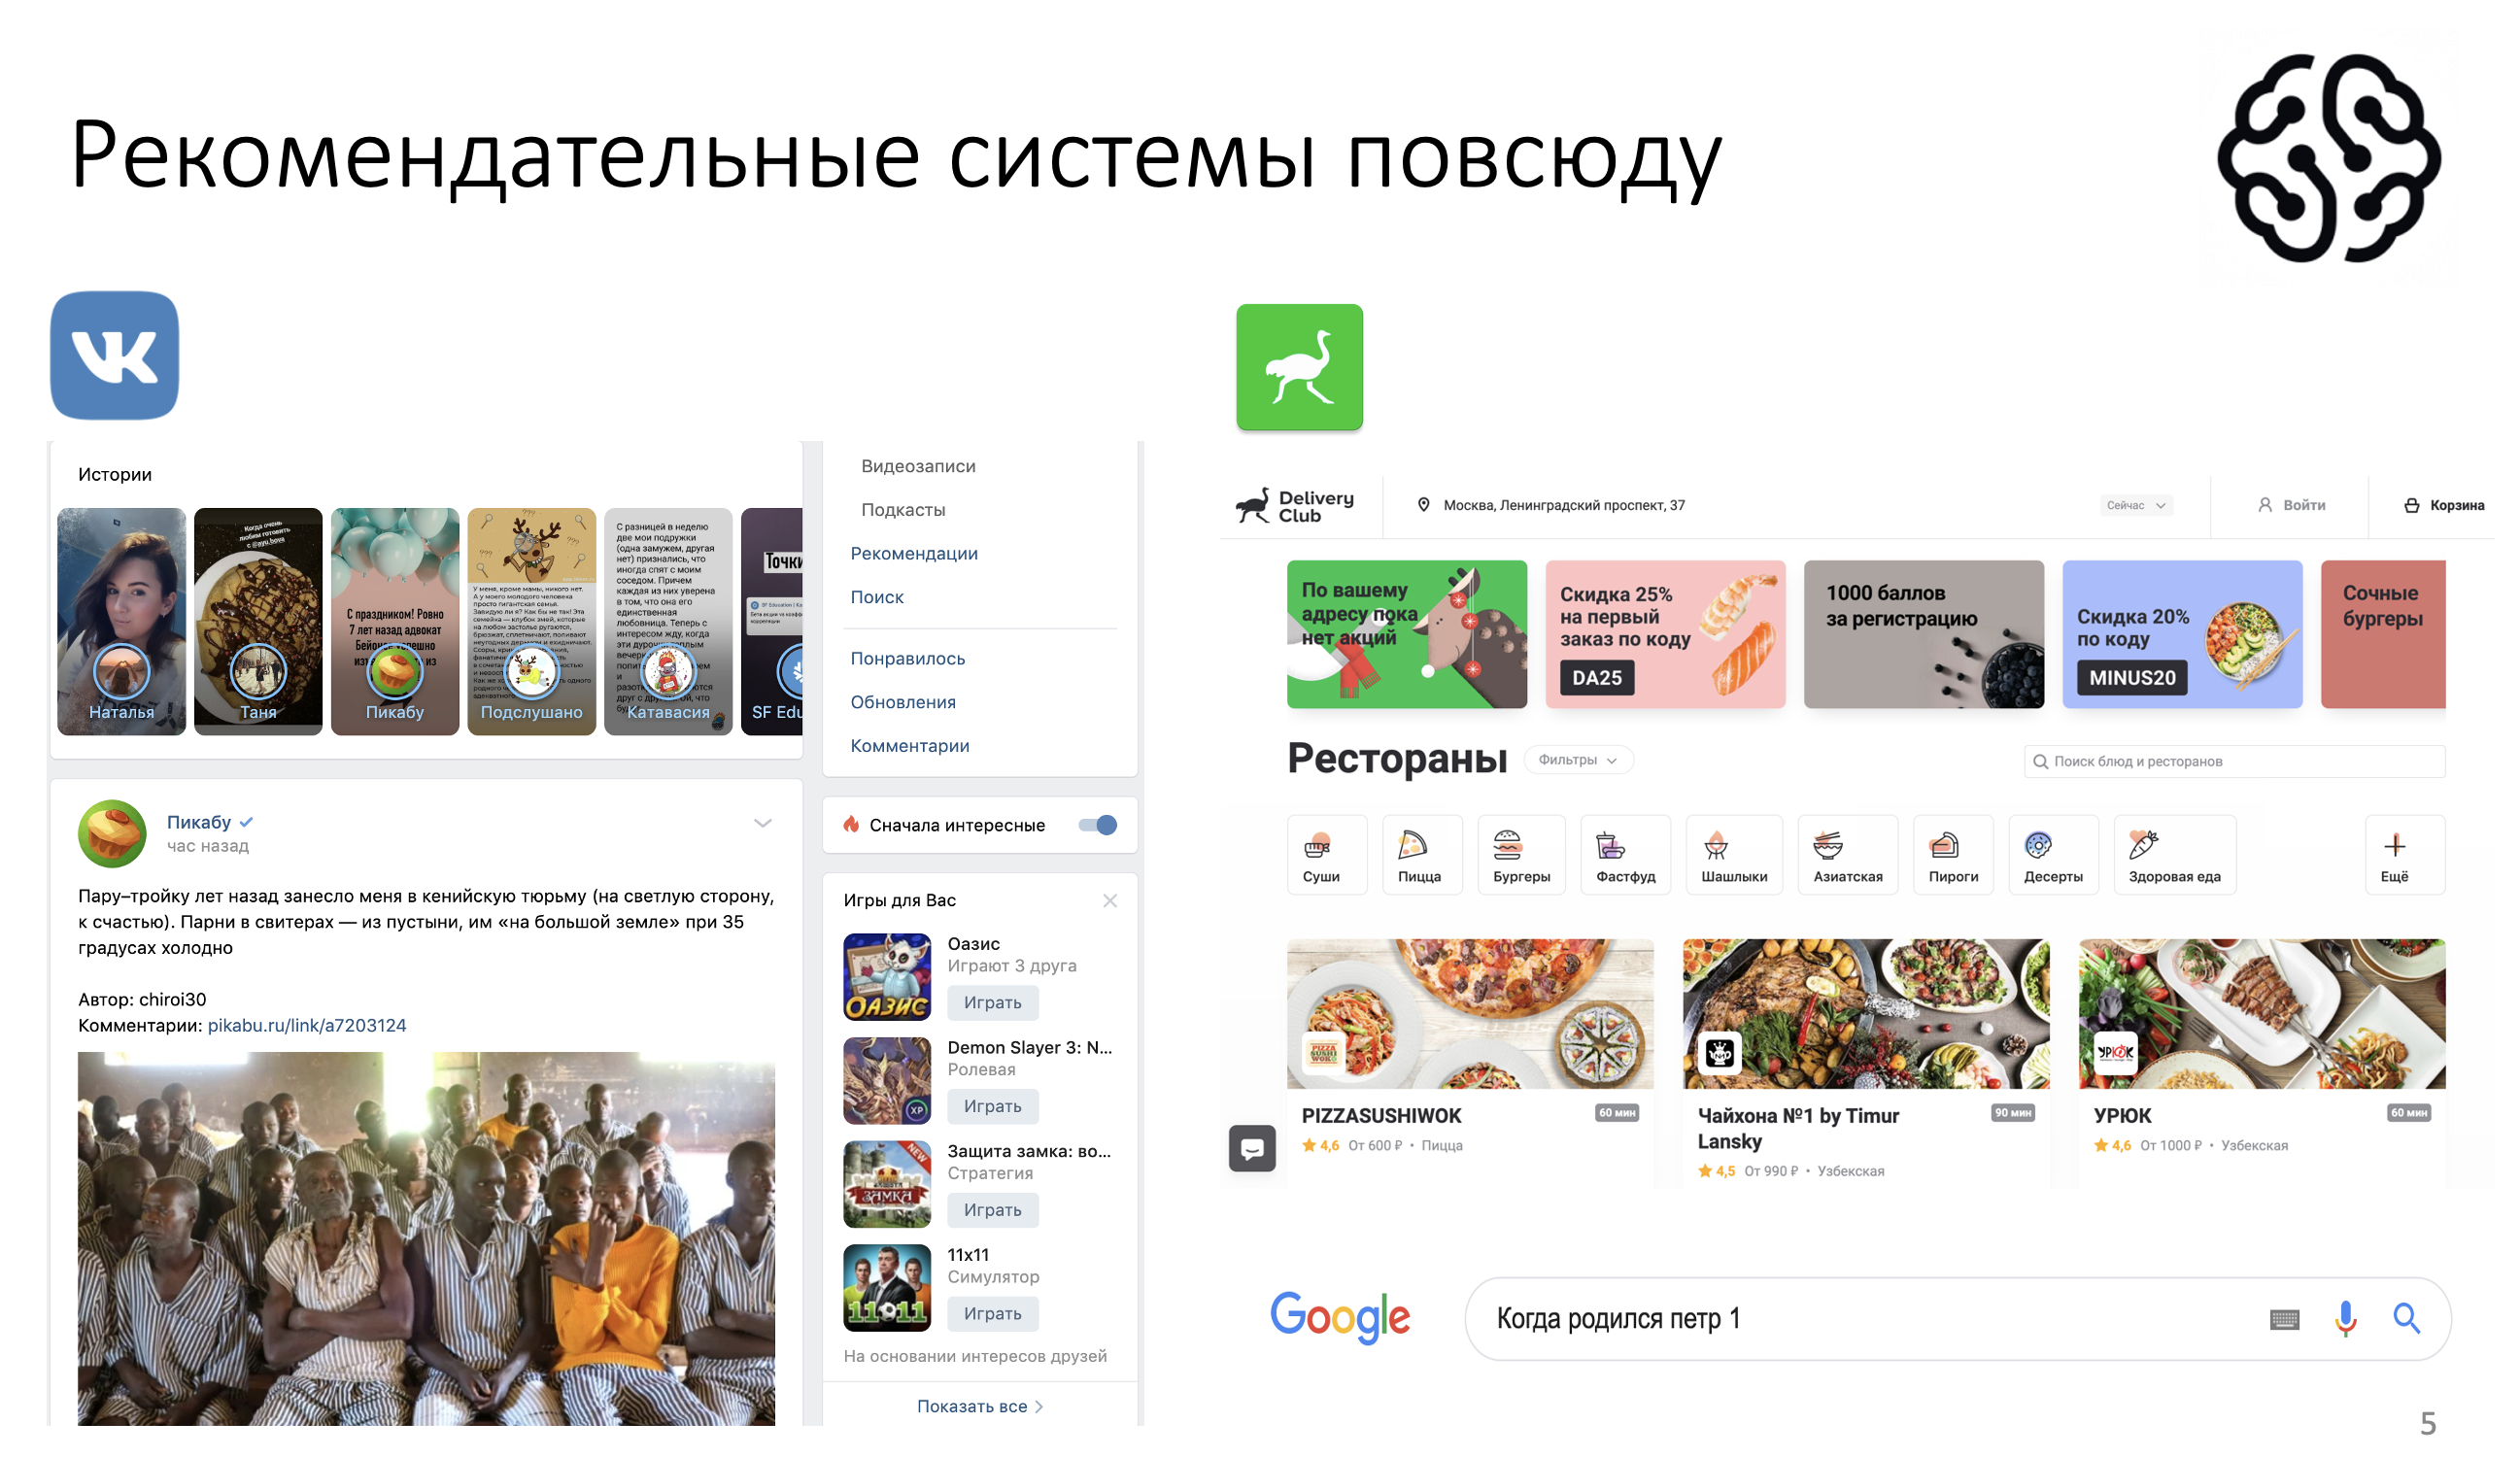

----

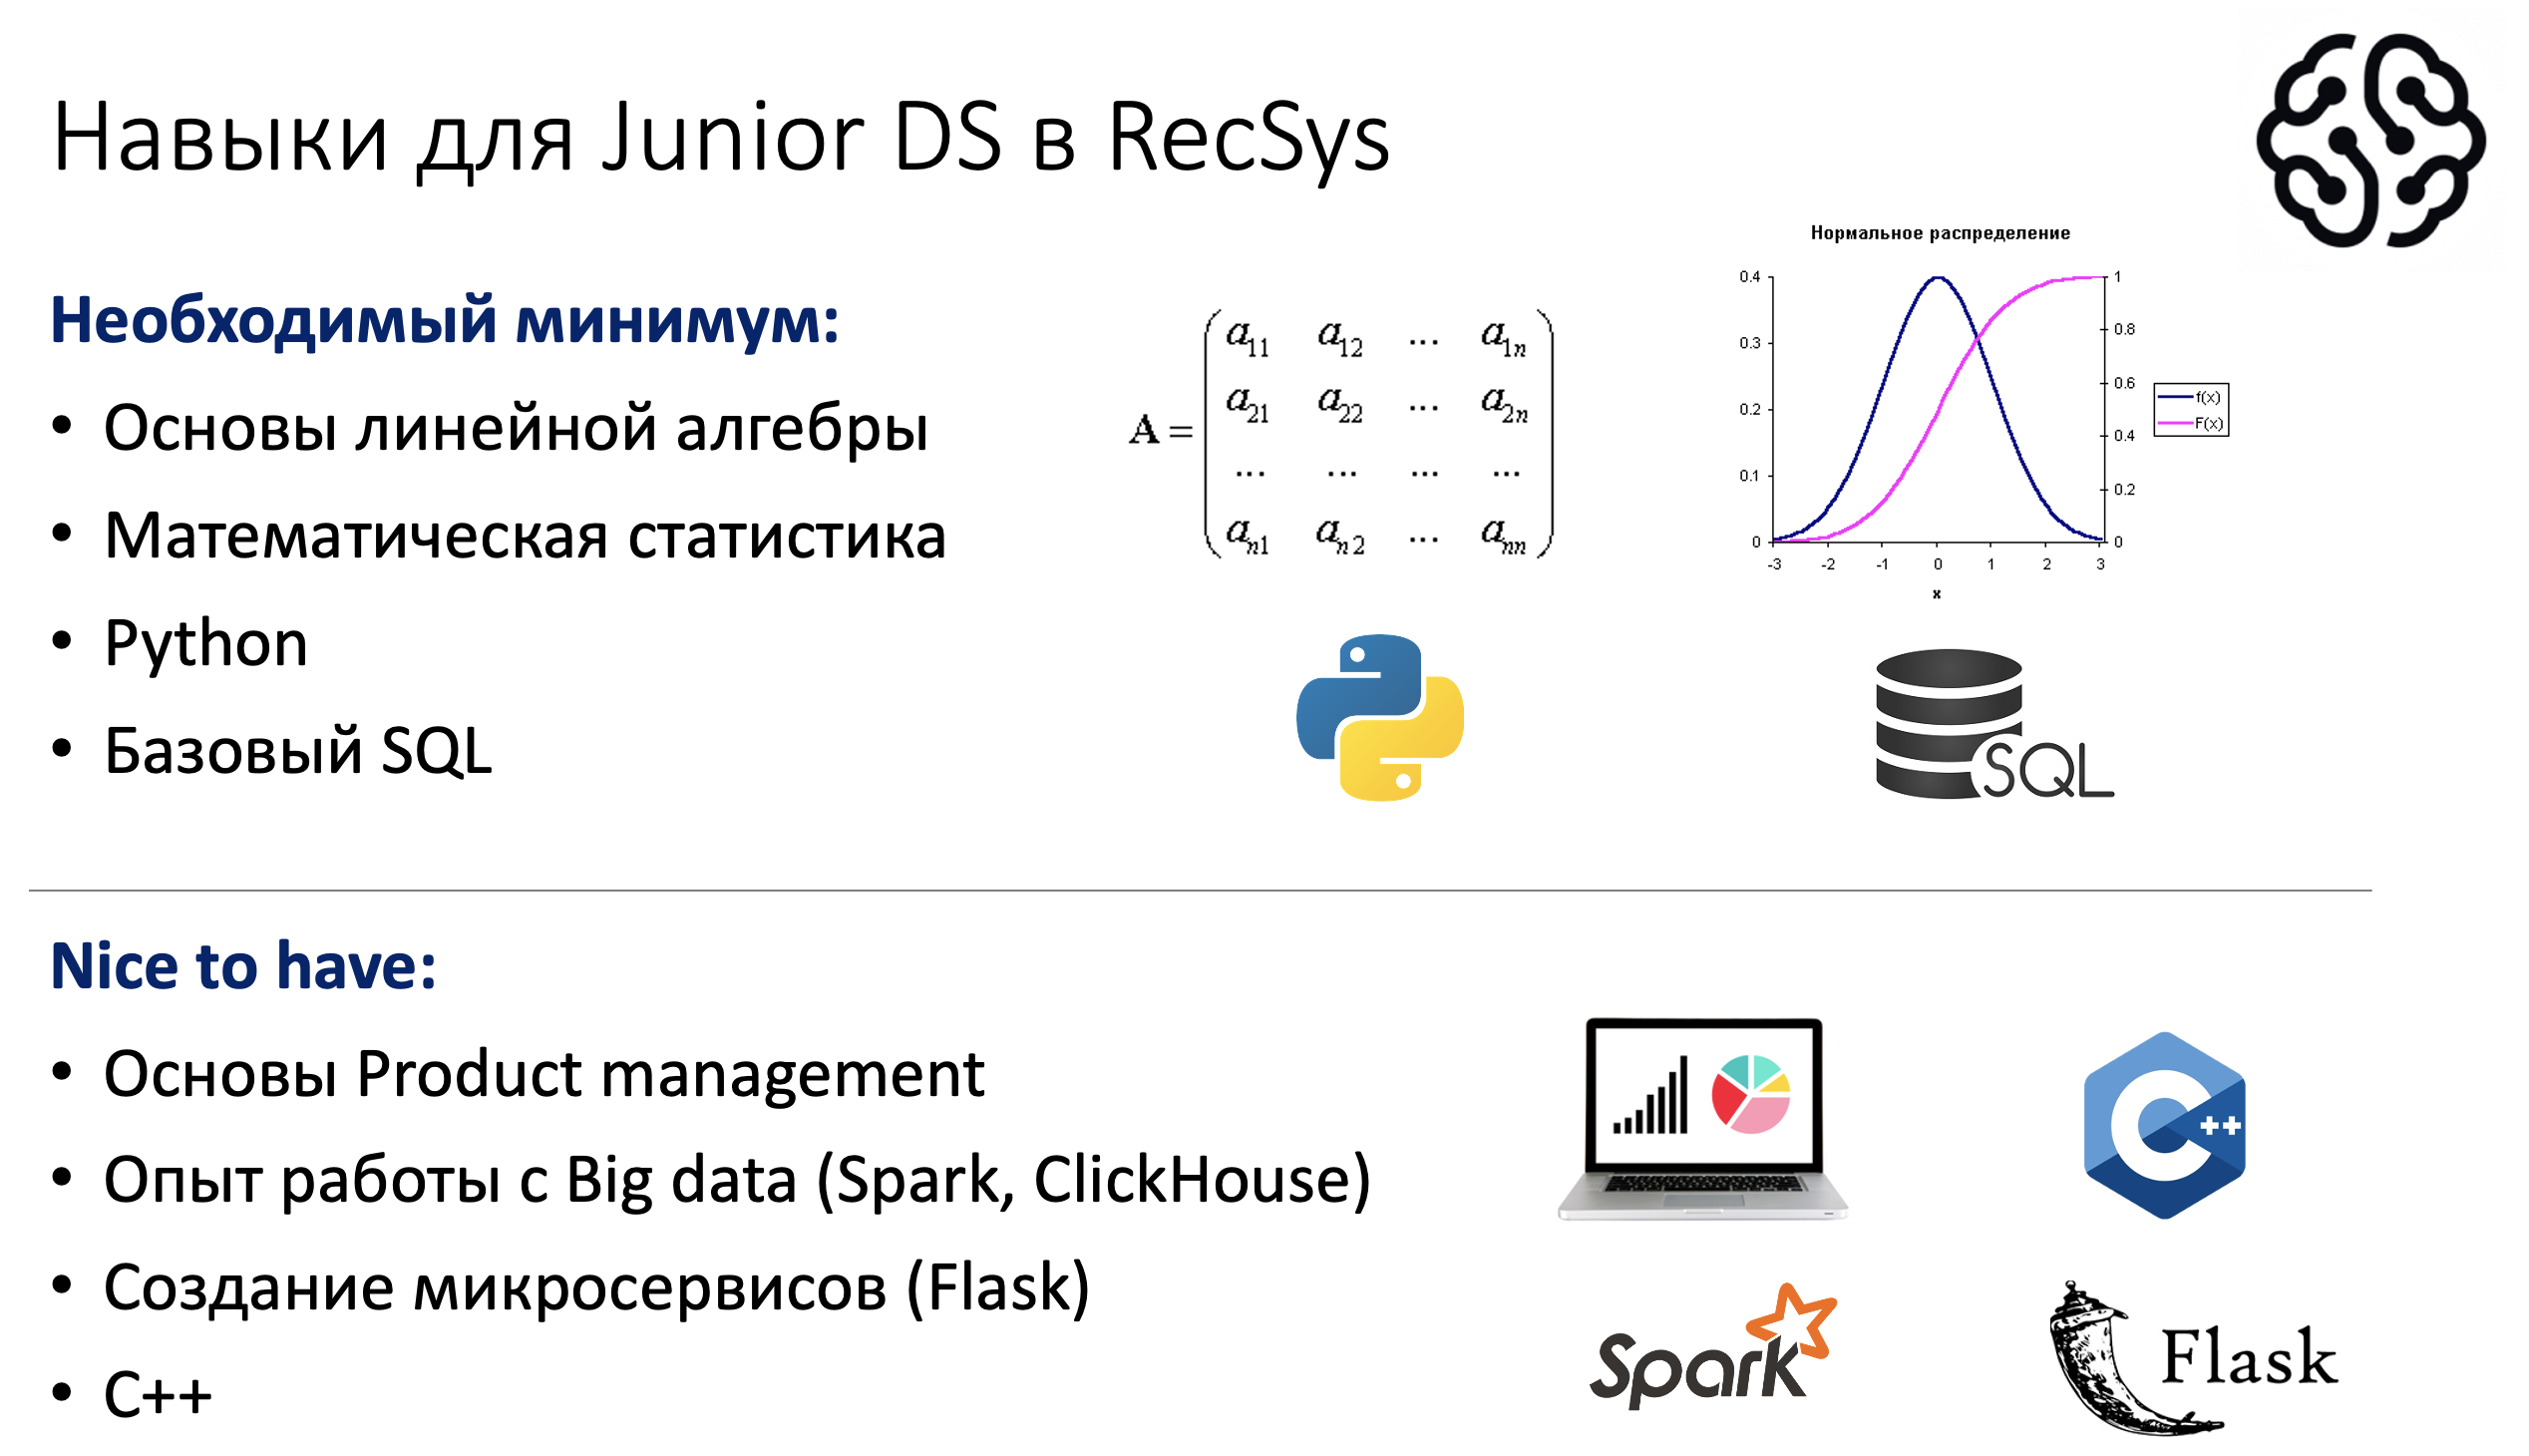

---

##  Постановка задачи

*Задача рекомендаций* - предложить пользователю товары, которые ему "понравятся"

Компоненты:
- Пользователи (users)
- Товары (items)
- Взаимодействия (interactions) - по ним понимаем, что товар "понравился"

---

## Виды рекомендательных систем

С точки зрения взаимодействия компонентов:
 - **Item to user** - предмет (пр.: товар) подбирается для пользователя
 - **Item to item** или **User to user** - для определенного предмета/пользователя подбирается наиболее "похожий" предмет/пользователь (товар-товар)
 - **User to item** - для предмета подбирается наиболее подходящий пользователь


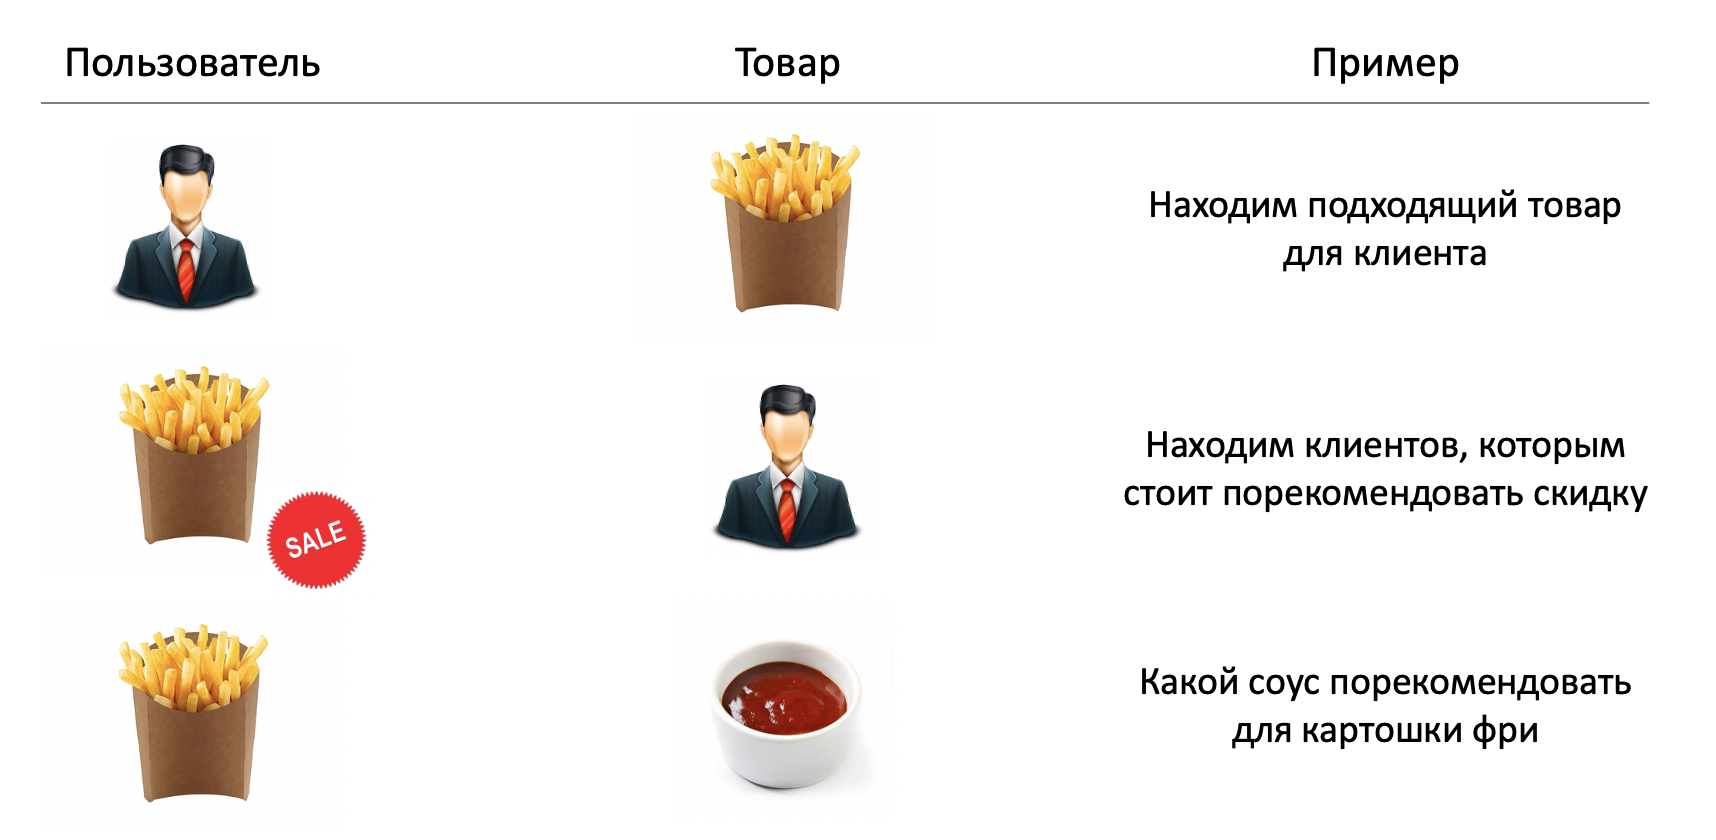


## Примеры рекомендательных систем

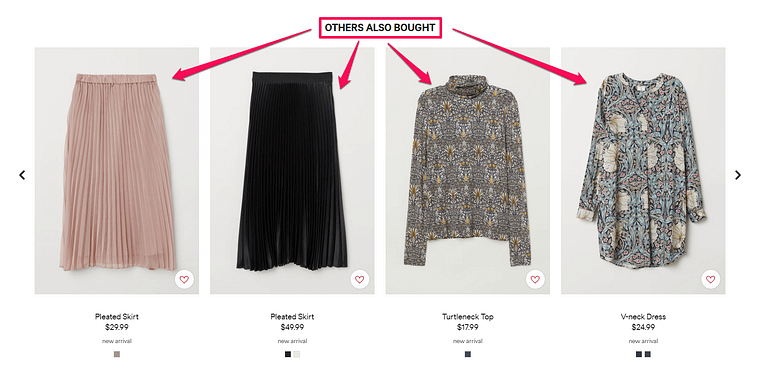

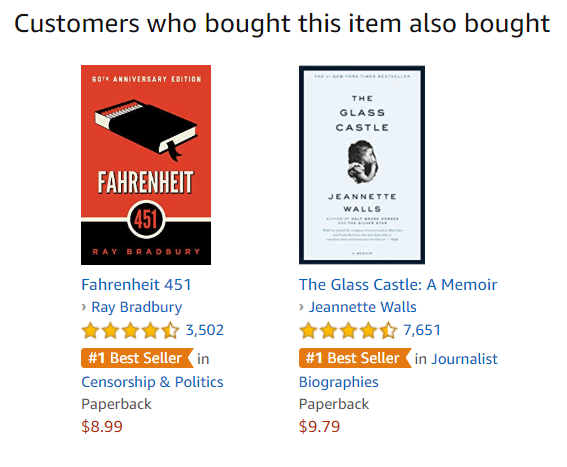

<!-- ![content_based_recommender_systems_imdb.png](attachment:4a256ec7-a295-4552-b4fa-262a25e6fcd2.png) -->

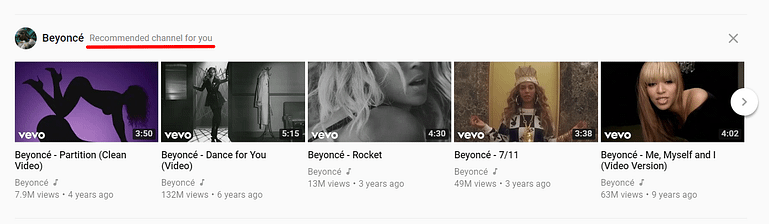


**Кейс**: определить в каждой ситуации, что является пользователем, а что - товаром
    
    1. На сайте Кинопоиска порекомендовать интересные фильмы
    2. На сайте hh.ru подобрать лучшие вакансии для соискателя вакансий
    3. На сайте hh.ru найти похожие вакансии на ту, которую сейчас просматривает пользователь ("вам также может понравиться")
    3. На сайте hh.ru подобрать лучших кандидатов для работодателя
    
*Пример ответа в чате:*
    1. Пользователь (П) - фильм, Товар (T) - фильм
    2. П - работодатель, Т - соискатель вакансий

---

## Взаимодействия --> "понравился товар"

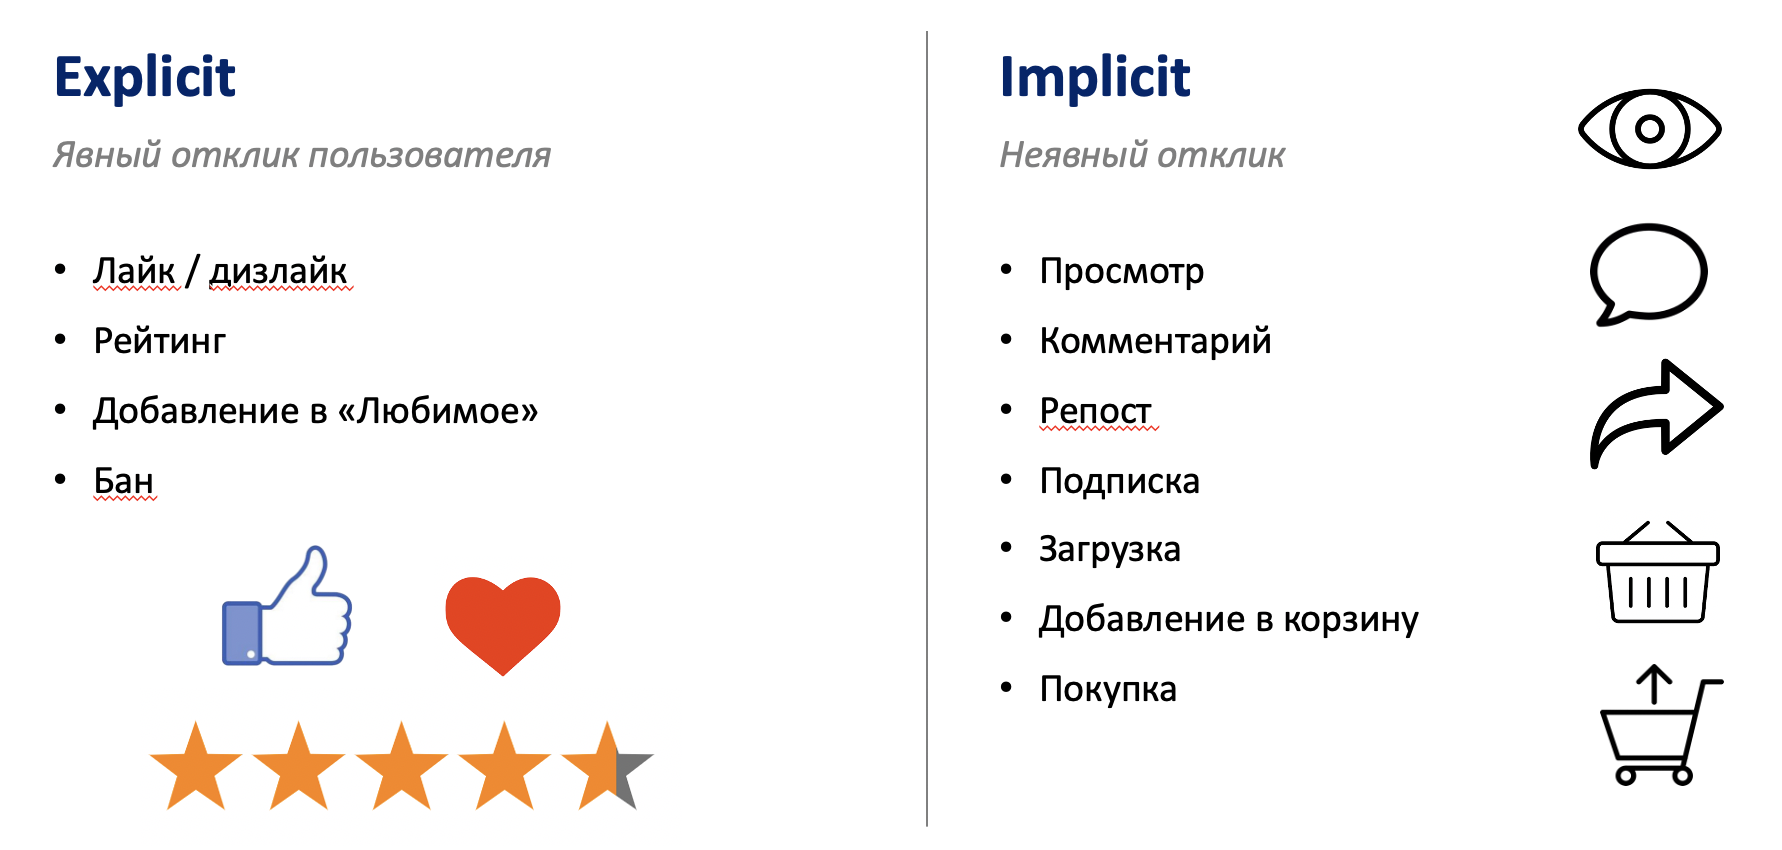

---

## В чем отличие от классификации?

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
pd.DataFrame([['Иван', 'Хлеб Бородинский', 1],
             ['Иван', 'Хлеб Белый', 0],
             ['Василий', 'Йогурт Epica', 1]], columns=['user', 'item', 'purchase_fact'])

user              item  purchase_fact
0     Иван  Хлеб Бородинский              1
1     Иван        Хлеб Белый              0
2  Василий      Йогурт Epica              1

Постойте, ведь можно добавить фичи на user (средний чек, кол-во покупок в категориях и т.д), 
на item (цена, кол-во продаж в неделю и т.l), и решать задачу классификации. В чем отличие RecSys от классификации?

 - Много предсказаний для 1 user (extreme classification)
 - Гораздо больший объем данных: 100K users, 10K items --> 1B предсказаний
 - Большинство товаров user никогда не видел --> Не взаимодействовал --> 0 не значит "не понравился"
 - Иногдаь важен порядок рекомендаций

In [3]:
pd.DataFrame([['Иван', 'Хлеб Бородинский', 1],
              ['Иван', 'Хлеб Белый', 0],
              ['Иван', 'Йогурт Epica', "?"],
              ['Василий', 'Хлеб Бородинский', "?"],
              ['Василий', 'Хлеб Белый', "?"],
              ['Василий', 'Йогурт Epica', 1]], columns=['user', 'item', 'purchase_fact'])

user              item purchase_fact
0     Иван  Хлеб Бородинский             1
1     Иван        Хлеб Белый             0
2     Иван      Йогурт Epica             ?
3  Василий  Хлеб Бородинский             ?
4  Василий        Хлеб Белый             ?
5  Василий      Йогурт Epica             1

----

## Основные типы задач:
    
**Рекомендация топ-К товаров**: Дан список товаров. Рекомендовать пользователю K товаров, которые ему понравятся
    - e-mail рассылки (М.Видео, Hoff, Пятерочка)
    - push-уведомления (Delivery Club, HeadHunter, Виктория)
    - Рекомендации в отдельном окне на сайте (vk, okko)

**Ранжирование товаров**: Дан список товаров. Нужно его отранжировать в порядке убывания интереса для пользователя
    - Ранжирование каталога товаров (Wildberries, Lamoda)
    - Ранжирование ленты (vk, Я.Дзен)
    - Ранжирование поисковой выдачи (Яндекс, Гугл)
    - Ранжирование "каруселей" товаров (Delivery Club, Я.Еда)
    
**Поиск похожих товаров**: Дан 1 товар. Нужно найти наиболее похожие на него товары
    - "Вам также может понравиться" (Ozon, Циан)
    - Похожим пользователям понравилось (vk)
    - Вы можете быть знакомы (vk, facebook)
    
**Рекомендация дополнителдьного товара**. Дан 1 товар. Найти товары, которые покупают вместе с этим товаром
    - С этим товаром часто покупают (Я.Маркет, Ozon, М.Видео)
    
   
---
На 7 вебинаре мы разберем существующие рекомендательные системы

---

# 2. ML-mетрики качества

*Хороши ли рекомендации, предлагаемые моделью?*  
Обычно считаются для каждого юзера, затем усредняются по юзерам

Представим, что в магазине всего 10 товаров

In [128]:
recommended_list = [143, 156, 1134, 991, 27, 1543, 3345, 533, 11, 43] #id товаров
bought_list = [521, 32, 143, 991]

prices_recommended = [440, 495, 380,  67, 919, 635,  79, 126,   4, 234]
prices_bought = [831, 155, 440, 67]

### 1. Hit rate

Hit rate = был ли хотя бы 1 релевантный товар среди рекомендованных

- Иногда применяется, когда продаются достаточно дрогие товары (например, бытовая техника) 

----
Hit rate = (был ли хотя бы 1 релевантный товар среди рекомендованных)   

Hit rate@k = (был ли хотя бы 1 релевантный товар среди топ-k рекомендованных)

In [95]:
def hit_rate(recommended_list, bought_list):
    
    bought_list = np.array(bought_list)
    recommended_list = np.array(recommended_list)
    
    flags = np.isin(bought_list, recommended_list)
    
    hit_rate = (flags.sum() > 0) * 1
    
    return hit_rate


def hit_rate_at_k(recommended_list, bought_list, k=5):
       
    try:
        int(k)
        if ((k > len(recommended_list)) or (k < 0)): k = len(recommended_list)
    except:
        k = 0
       
    # your_code
    return hit_rate(recommended_list[:k], bought_list)
    

In [61]:
hit_rate(recommended_list, bought_list)

1

In [62]:
hit_rate_at_k(recommended_list_2, bought_list, k=-1)

1

In [51]:
# Пример для 0 хитрейта при К

recommended_list_2 = [111, 156, 1134, 991, 27, 1543, 3345, 533, 11, 43] #id товаров

*Какое должно быть K чтобы значение получилось равным 1?*

In [97]:
K = 4

assert hit_rate_at_k(recommended_list_2, bought_list, k=K) == 1

hit_rate_at_k(recommended_list_2, bought_list, k=K)

1

### 2. Precision

*Precision* - доля релевантных товаров среди рекомендованных = Какой % рекомендованных товаров  юзер купил

- Пожалуй, самая приближенная к бизнес-метрикам и самая популярная метрика

---

Precision= (# of recommended items that are relevant) / (# of recommended items)  

Precision@k = (# of recommended items @k that are relevant) / (# of recommended items @k)

Money Precision@k = (revenue of recommended items @k that are relevant) / (revenue of recommended items @k)  

**Note:** Обычно k в precision@k достаточно невелико (5-20) и определяется из бизнес-логики. Например, 5 товаров в e-mail рассылке, 10 ответов на первой странице поиска и т.д

Красная рыба - 400 руб  
Молоко - 60 руб  
Хлеб = 40 руб  
Гречка = 40 руб  
Шоколад = 90 руб  

------  
Варенье - 240 руб  
...  

**Case 1**  
prices_resommended = [400, 60, 40, 40 , 90]  
flags = [1, 0, 0, 0 , 1]  

$precison@5 = \frac{1 + 0 + 0 +0 + 1}{1+1+1+1+1} = 40\%$  
$money precision@5 = \frac{1*400 + 0*60 + ... + 1*90}{1*400 + 1*60 + ... + 1*90} = 77.7\%$  

  
**Case 2**   
prices_resommended = [400, 60, 40, 40 , 90]  
flags = [0, 1, 0, 0 , 1]  

$precison@5 = \frac{0 + 1 + 0 +0 + 1}{1+1+1+1+1} = 40\%$  
$money precision@5 = \frac{0*400 + 1*60 + ... + 1*90}{1*400 + 1*60 + ... + 1*90} = 15.8\%$

In [148]:
def precision(recommended_list, bought_list):
    
    bought_list = np.array(bought_list)
    recommended_list = np.array(recommended_list)
    
    flags = np.isin(bought_list, recommended_list)
    
    precision = flags.sum() / len(recommended_list)
    
    return precision


def precision_at_k(recommended_list, bought_list, k=5):
    
    bought_list = np.array(bought_list)
    recommended_list = np.array(recommended_list)
    try:
        int(k)
        if ((k > len(recommended_list)) or (k < 0)): k = len(recommended_list)
    except:
        k = 0
    
    bought_list = bought_list  # Тут нет [:k] !!
    recommended_list = recommended_list[:k]
    
    flags = np.isin(bought_list, recommended_list)
    
    precision = flags.sum() / len(recommended_list)
    
    if np.isnan(precision): precision = 0
        
    return precision


def money_precision_at_k(recommended_list, bought_list, prices_recommended, k=5):
        
    # your_code
    # Лучше считать через матричное произведение, а не цикл
    bought_list = np.array(bought_list)
    recommended_list = np.array(recommended_list)
    prices_recommended = np.array(prices_recommended)
    
    try:
        int(k)
        if ((k > len(recommended_list)) or (k < 0)): k = len(recommended_list)
    except:
        k = 0
    
    bought_list = bought_list  # Тут нет [:k] !!
    recommended_list = recommended_list[:k]
    prices_recommended = prices_recommended[:k]
    
    flags = np.isin(recommended_list, bought_list)
    
    precision = flags.dot(prices_recommended) / prices_recommended.sum()
    
    if np.isnan(precision): precision = 0
        
    return precision

In [149]:
money_precision_at_k(recommended_list, bought_list, prices_recommended, k=5)

0.22033898305084745

In [146]:
precision(recommended_list, bought_list)

0.2

---

In [119]:
precision_at_k(recommended_list, bought_list, k=5)

0.4

In [120]:
K = 3

assert np.isclose(precision_at_k(recommended_list, bought_list, k=K), 0.333, atol=1e-3)

precision_at_k(recommended_list, bought_list, k=K)

0.3333333333333333

In [13]:
(recommended_list[:K], bought_list)

([143, 156, 1134], [521, 32, 143, 991])

In [14]:
assert precision(recommended_list, bought_list) == precision_at_k(recommended_list, bought_list, k=len(recommended_list))

In [15]:
K = 5

assert np.isclose(precision_at_k(recommended_list, bought_list, k=K), 0.4, atol=1e-3)

precision_at_k(recommended_list, bought_list, k=K)

0.4

In [16]:
(recommended_list[:K], bought_list)

([143, 156, 1134, 991, 27], [521, 32, 143, 991])

---

In [17]:
K = 3

assert np.isclose(money_precision_at_k(recommended_list, bought_list, prices_recommended, k=K), 0.3346, atol=1e-4)

money_precision_at_k(recommended_list, bought_list, prices_recommended, k=K)

0.33460076045627374

*Как будет изменяться precision и money precision в зависимости от K?*

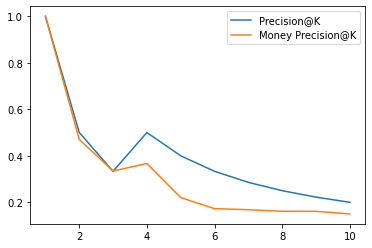

In [150]:
pr_range = list()
money_pr_range = list()

linspace = range(1, len(recommended_list) + 1)

for i in linspace:
    pr_range.append(precision_at_k(recommended_list, bought_list, k=i))
    money_pr_range.append(money_precision_at_k(recommended_list, bought_list, prices_recommended, k=i))
    
plt.plot(linspace, pr_range, label='Precision@K')
plt.plot(linspace, money_pr_range, label='Money Precision@K')
plt.legend()
plt.show()

### 3. Recall

*Recall* - доля рекомендованных товаров среди релевантных = Какой % купленных товаров был среди рекомендованных

- Обычно используется для моделей пре-фильтрации товаров (убрать те товары, которые точно не будем рекомендовать)

---

Recall= (# of recommended items that are relevant) / (# of relevant items)  

Recall@k = (# of recommended items @k that are relevant) / (# of relevant items)

Money Recall@k = (revenue of recommended items @k that are relevant) / (revenue of relevant items)  

    
  
**Note:** в recall@k число k обычно достаточно большое (50-200), больше чем покупок у среднестатистического юзера

In [157]:
def recall(recommended_list, bought_list):
    
    bought_list = np.array(bought_list)
    recommended_list = np.array(recommended_list)
    
    flags = np.isin(bought_list, recommended_list)
    
    recall = flags.sum() / len(bought_list)
    
    return recall


def recall_at_k(recommended_list, bought_list, k=5):
    
    # your code
    
    return recall(recommended_list[:k], bought_list)


def money_recall_at_k(recommended_list, bought_list, prices_recommended, prices_bought, k=5):
    
    # your_code
    bought_list = np.array(bought_list)
    recommended_list = np.array(recommended_list)
    prices_recommended = np.array(prices_recommended)
    prices_bought = np.array(prices_bought)
    
    try:
        int(k)
        if ((k > len(recommended_list)) or (k < 0)): k = len(recommended_list)
    except:
        k = 0
    
    assert recommended_list.shape == prices_recommended.shape
    assert bought_list.shape == prices_bought.shape
    
    recommended_list = recommended_list[:k]
    prices_recommended = prices_recommended[:k]
    
    flags = np.isin(bought_list, recommended_list)
    
    res = flags.dot(prices_bought) / prices_bought.sum()
    
    if np.isnan(res): res = 0
    
    return res

In [158]:
recall(recommended_list, bought_list)

0.5

In [159]:
recall_at_k(recommended_list, bought_list, k=3)

0.25

---

In [160]:
assert recall(recommended_list, bought_list) == recall_at_k(recommended_list, bought_list, k=len(recommended_list))

In [161]:
K = 3

assert np.isclose(recall_at_k(recommended_list, bought_list, k=K), 0.25)

recall_at_k(recommended_list, bought_list, k=K)

0.25

In [162]:
(recommended_list[:K], bought_list)

([143, 156, 1134], [521, 32, 143, 991])

In [163]:
K = 5

assert recall_at_k(recommended_list, bought_list, k=K) == 0.5

recall_at_k(recommended_list, bought_list, k=K)

0.5

In [164]:
(recommended_list[:K], bought_list)

([143, 156, 1134, 991, 27], [521, 32, 143, 991])

---

In [167]:
K = 5

# assert np.isclose(money_recall_at_k(recommended_list, bought_list, prices_recommended, prices_bought, k=K), 0.2947, atol=1e-4)

money_recall_at_k(recommended_list, bought_list, prices_recommended, prices_bought, k=K)

0.33958472873409246

*Мы уже видели как изменяется Precision в зависимости от К, будет ли отличаться график зависимости Recall от K?*

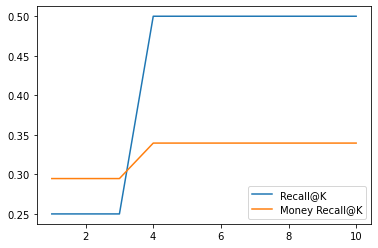

In [166]:
recall_range = list()
money_recall_range = list()

linspace = range(1, len(recommended_list) + 1)

for i in linspace:
    recall_range.append(recall_at_k(recommended_list, bought_list, k=i))
    money_recall_range.append(money_recall_at_k(recommended_list, bought_list, prices_recommended, prices_bought, k=i))
    
plt.plot(linspace, recall_range, label='Recall@K')
plt.plot(linspace, money_recall_range, label='Money Recall@K')
plt.legend()
plt.show()

Замечание про recall и precision в практике.

#### 4. F1-score

F1 score - это метрика, отражающая баланс между precision и recall. Это среднее гармоническое значение precision и recall.

$$F1 = 2 \times \frac{Precision \times Recall}{Precision + Recall}$$

In [173]:
def f1_score_at_k(recommended_list, bought_list, k=5):
    
    # Your code    
    f1 = 2 * (recall_at_k(recommended_list, bought_list, k) * precision_at_k(recommended_list, bought_list, k)) / (recall_at_k(recommended_list, bought_list, k) + precision_at_k(recommended_list, bought_list, k))
    
    return f1

In [174]:
K = 3

assert np.isclose(f1_score_at_k(recommended_list, bought_list, k=K), 0.285, atol=1e-3)

f1_score_at_k(recommended_list, bought_list, k=K)

0.28571428571428575

In [175]:
K = 5

assert np.isclose(f1_score_at_k(recommended_list, bought_list, k=K), 0.444, atol=1e-3)

f1_score_at_k(recommended_list, bought_list, k=K)

0.4444444444444445

В случае если у нас нет значения K, то F1 score считается для k = min(len(recommended_list), N), где N номер элемента, который включает в себя последний релевантный элемент из всех.

# Метрики ранжирования

Если важен порядок рекомендаций. Подробнее можно почитать [здесь](https://habr.com/ru/company/econtenta/blog/303458/). Формулы в статье могут несколько отличаться от формул в лекции 

## AP@k
AP@k - average precision at k

$$AP@k = \frac{1}{r} \sum{[recommended_{relevant_i}] * precision@k}$$

- r - кол-во релевантный среди рекомендованных
- Суммируем по всем релевантным товарам
- Зависит от порядка реокмендаций

In [32]:
np.isin(recommended_list, bought_list)

array([ True, False, False,  True, False, False, False, False, False,
       False])

In [176]:
def ap_k(recommended_list, bought_list, k=5):
    
    bought_list = np.array(bought_list)
    recommended_list = np.array(recommended_list)
    
    flags = np.isin(recommended_list, bought_list)
    
    if sum(flags) == 0:
        return 0
    
    sum_ = 0
    for i in range(1, k+1):
        
        if flags[i - 1] == True:
            p_k = precision_at_k(recommended_list, bought_list, k=i)
#             print(p_k)
            
            sum_ += p_k
            
    result = sum_ / min(len(recommended_list), k)
    
    return result

In [177]:
# assert np.isclose(ap_k(recommended_list, bought_list, k=5), 0.166, atol=1e-3)

ap_k(recommended_list, bought_list, k=5)

0.3

In [178]:
(recommended_list, bought_list)

([143, 156, 1134, 991, 27, 1543, 3345, 533, 11, 43], [521, 32, 143, 991])

### MAP@k

MAP@k (Mean Average Precision@k)  
Среднее AP@k по всем юзерам
- Показывает средневзвешенную точность рекомендаций

$$MAP@k = \frac{1}{|U|} \sum_u{AP_k}$$
  
|U| - кол-во юзеров

In [181]:
recommended_list_list = [recommended_list, recommended_list_2]
bought_list_list = [bought_list, bought_list]

In [184]:
def map_k(recommended_list_list, bought_list_list, k=5):
    
    # Your code
    assert len(recommended_list_list) == len(bought_list_list)
    s = 0
    for i in np.arange(len(recommended_list_list)):
        s += ap_k(recommended_list_list[i], bought_list_list[i], k)
    return s/len(recommended_list_list)

In [185]:
K = 1

assert np.isclose(map_k(recommended_list_list, bought_list_list, k=K), 0.5, atol=1e-3)

map_k(recommended_list_list, bought_list_list, k=K)

0.5

In [186]:
K = 5

assert np.isclose(map_k(recommended_list_list, bought_list_list, k=K), 0.175, atol=1e-3)

map_k(recommended_list_list, bought_list_list, k=K)

0.175

### AUC@k
AUC для первых k наблюдений  
- Можно посчитать как sklern.metrics.roc_auc_score для топ-k предсказаний
- Показывает долю верно отранжированных товаров

### NDCG@k
Normalized discounted cumulative gain

$$DCG = \frac{1}{|r|} \sum_u{\frac{[bought fact]}{discount(i)}}$$  

$discount(i) = 1$ if $i <= 2$,   
$discount(i) = log_2(i)$ if $i > 2$


(!) Считаем для первых k рекоммендаций   
(!) - существуют вариации с другими $discount(i)$  
i - ранк рекомендованного товара  
|r| - кол-во рекомендованных товаров 

$$NDCG = \frac{DCG}{ideal DCG}$$


In [40]:
recommended_list = [143, 156, 1134, 991, 27, 1543, 3345, 533, 11, 43] #id товаров
bought_list = [521, 32, 143, 991]

$DCG@5 = \frac{1}{5}*(1 / 1 + 0 / 2 + 0 / log(3) + 1 / log(4) + 0 / log(5))$  
$ideal DCG@5 = \frac{1}{5}*(1 / 1 + 1 / 2 + 1 / log(3) + 1 / log(4) + 1 / log(5))$  

$NDCG = \frac{DCG}{ideal DCG}$

### MRR@k
Mean Reciprocal Rank

- Считаем для первых k рекоммендаций
- Найти ранк первого релевантного предсказания $k_u$
- Посчитать reciprocal rank = $\frac{1}{k_u}$

$$MRR = mean(\frac{1}{k_u})$$

In [41]:
def reciprocal_rank(recommended_list, bought_list):
    
    # Your code


def reciprocal_rank_at_k(recommended_list, bought_list):
    
    # Your code
    
    return result

In [42]:
assert np.isclose(reciprocal_rank(recommended_list, bought_list), 1.)

reciprocal_rank(recommended_list, bought_list)

1.0

*Каким будет MRR для второго списка рекомендаций?*

In [43]:
(recommended_list_2, bought_list)

([111, 156, 1134, 991, 27, 1543, 3345, 533, 11, 43], [521, 32, 143, 991])

In [44]:
reciprocal_rank(recommended_list_2, bought_list)

0.25

# 3. Связь бизнес-метрик, ML-метрик и функции потерь(loss)

- **loss** - то, что оптимизирует модель (RMSE - Root Mean Squared Error)
- **ML-метрика** - то, как мы измеряем качество на test (money precision@5)
- **Бизнес-метрика** - то, что хочет оптимизировать бизнес (выручка)

В идеале loss = ML-метрика = бизнес-метрика, но это возмонжо в очень редких случаях

Надеемся, что:  
    *Оптимизация loss --> рост ML-метрик --> рост бизнес-метрик*

### Пример: рекомендательная система товаров на сайте  
      
На сайте есть баннер, на котором мы можем разместить 5 товаров. Надо порекомендовать эти 5 товаров персонально каждому юзеру

*Шаг 1: Определим бизнес-метрику*  
Бизнес хочет максимизировать выручку --> бизнес-метрика - **Выручка**  

*Шаг 2: Разложим ее на составляющие*  
Выручка =   
       Средний чек * кол-во покупок =   
       Средний чек * (число юзеров * конверсия из захода на сайт в заказ) =
       Число юзеров * (Средний чек * конверсия из захода на сайт в заказ)
       
Рекомендательная система влияет только на (Средний чек * конверсия из захода на сайт в заказ).   
Хорошим приближением этого является **money precision@5** - ML-метрика

*Шаг 3: loss*  
Это существенно сложнее. Персонализированные ML-модели не умеют напрямую оптимизировать конверсию. Стандартный loss - **RMSE**. Можно для начала попробовать его. 

P.S. Если вы хотите приблизить RMSE к money precision@5, то можно посчитать weighted RMSE, где вес каждого наблюдения пропорционален стоимость товара.   
P.S.S. Про другие виды loss будет рассказано в курсе

### Ресурсы

Homework:
 - [Pylint](https://pylint.pycqa.org/en/latest/tutorial.html)
 - [Pep 8 [Ru]](https://pythonworld.ru/osnovy/pep-8-rukovodstvo-po-napisaniyu-koda-na-python.html)

Light version:

- [Recommender system introduction](https://www.iteratorshq.com/blog/an-introduction-recommender-systems-9-easy-examples)
- [Google guides](https://developers.google.com/machine-learning/recommendation)

Hard version:

- [Recommender systems [ML Compendium]](https://book.mlcompendium.com/recommender-systems)